In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # display all columns
pd.set_option("max_colwidth", 40) # sets a maximum column width
pd.set_option("display.precision", 7) # sets the number of decimals shown
pd.set_option("styler.format.precision", 3) # rounds floats

df = pd.read_csv("../data/country-data.csv").set_index("country")
countries = list(df.index)
numerical_features = df.columns

In [3]:
df.isna().sum().sum() # no missing values in data

0

In [ ]:
def style_df(df):
    """Style dataframe"""
    cell_hover = {
        'selector': 'td:hover',
        'props': [('background-color', '#ffffb3')]
    }
    row_hover = {
        'selector': 'tr:hover',
        'props': [('background-color', '#ffffb3')]
    }
    
    numeric_columns = df.select_dtypes(include=['int8','int16','int32','int64', 'float16', 'float32', 'float64']).columns
    styler = df.style
    
    styler\
        .set_caption("INSERT CAPTION")\
        .background_gradient(axis="rows", cmap="Blues", subset=['child_mort', 'exports', 'health', 'imports', 'income', 'life_expec', 'total_fer', 'gdpp'])\
        .set_table_styles([cell_hover, row_hover])\
        .format({
            "exports": "{:}%",
            "health": "{:}%",
            "imports": "{:}%",
            })\
        .highlight_max(color="red", subset=numeric_columns)\
        .highlight_min(color="lightgreen", subset=numeric_columns)\
        .bar(subset=["inflation"], align="zero", color=["red", "lightgreen"]) # bar chart
        #.highlight_quantile(q_left=0.25, q_right=0.75, subset="imports", color="red") # highlight quantiles
        #.highlight_between(left=70, right=80, subset="life_expec", color="yellow") # highlight range of values

    return styler

style_df(df.sort_values("child_mort"))

In [23]:
with open("../out/data_overview.html", "w") as f:
    f.write(style_df(df.sort_values("child_mort")).render())

/var/folders/r8/9_x5mqbs79gbpktlgmt3lyb40000gn/T/ipykernel_7100/3826058741.py:2: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  f.write(style_df(df.sort_values("child_mort")).render())


# Plotting distribution of all features

/var/folders/r8/9_x5mqbs79gbpktlgmt3lyb40000gn/T/ipykernel_7100/3919994098.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_features[i]], color="blue", bins=15)
/var/folders/r8/9_x5mqbs79gbpktlgmt3lyb40000gn/T/ipykernel_7100/3919994098.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

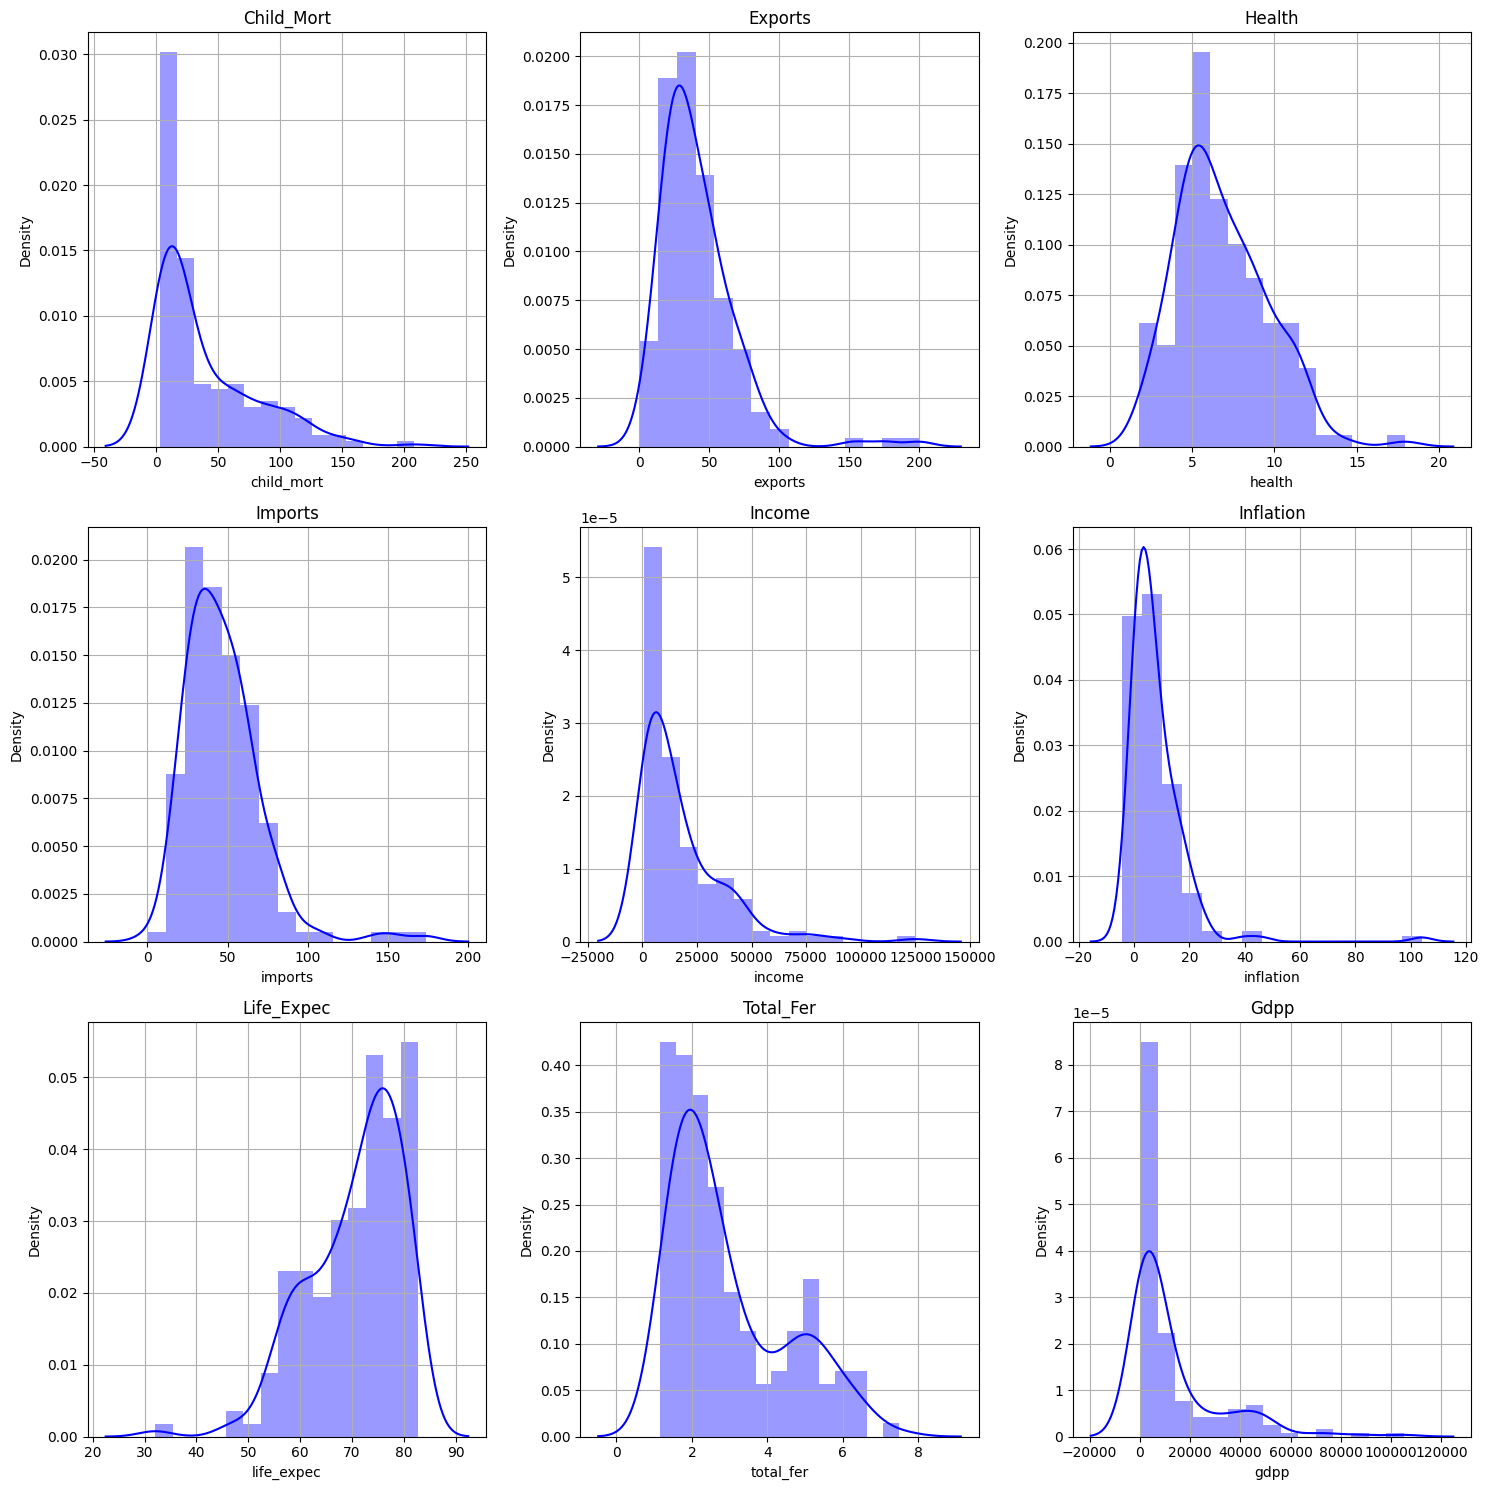

In [39]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i in range(len(numerical_features)):
    plt.subplot(3, 3, i+1)
    sns.distplot(df[numerical_features[i]], color="blue", bins=15)
    plt.grid()
    plt.title(f"{numerical_features[i].title()}")
plt.savefig("../out/distributions.png", dpi=300)
plt.tight_layout()
plt.show()

We observe that:
- **health** is somewhat normally distributed
- **life expectance** is negatively-skewed (or left-skewed)
- the of the distributions are positively skewed (right-skewed)

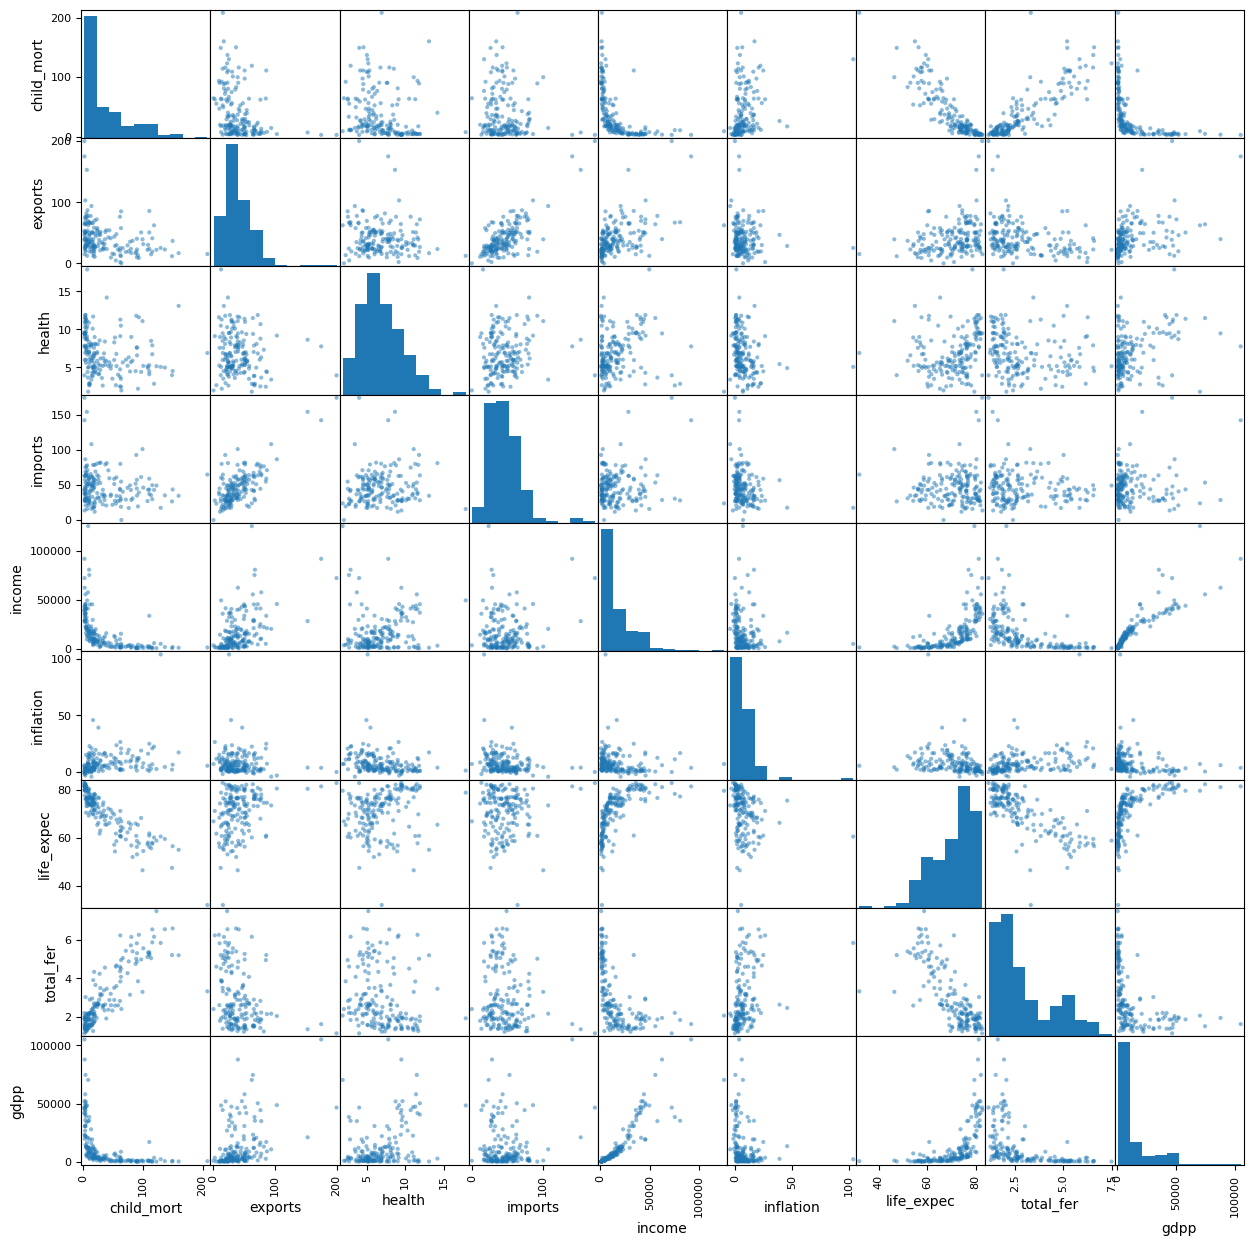

In [38]:
# plots a scatter matrix, that contains histograms on the diagonal
# and scatterplots showing the relationship between pairs of variables
# in the other cells
pd.plotting.scatter_matrix(df[numerical_features], diagonal='hist', figsize=(15, 15))
plt.savefig("../out/scatter_matrix.png", dpi=400)
plt.show()

## Child mortality

In [ ]:
def barplot(feature: str):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 4))
    plt.bar(
        list(df[feature].sort_values().index), 
        df[feature].sort_values()
    )
    plt.xticks(rotation=90, fontsize=6)
    plt.tick_params(labeltop=False, labelright=True)
    plt.margins(x=0, tight=True)
    plt.title(f"{feature.title()} Rate For Each Country")
    plt.savefig(f"../out/{feature}.png", dpi=400)
    plt.show()

for feature in df.columns:
    barplot(feature)